## Exercise 04 : Histogram ##

## Imports ##

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Task #
В предыдущем упражнении вам нужно было построить распределение, группируя значения с помощью Pandas. Не было бы здорово, если бы мы могли сделать это более автоматизировано?

Но для этого нужно использовать другой тип визуализации — гистограммы. На этот раз мы не будем использовать средние значения. Мы будем использовать абсолютное число коммитов и сравнивать их в рабочие дни и выходные.

Сделайте всё необходимое, чтобы создать график, похожий на Readme.

* анализировать только пользователей, а не администраторов
* создайте два списка значений (для рабочих дней и для выходных) для входных данных гистограммы
* размеры фигуры остаются такими же, выберите размер шрифта и цветовую палитру
* используйте уровень прозрачности для переднего слоя гистограммы равный 0.7
* в конце вашего Jupyter Notebook создайте markdown-клетку и вставьте вопрос:
“Есть ли часы, когда общее число коммитов было больше в выходные, чем в рабочие дни?” В вашем ответе укажите 4 лучших примера.

In [ ]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [ ]:
df = pd.read_sql('SELECT * FROM checker WHERE uid LIKE "%user%"', conn, parse_dates=['timestamp']) 
df['day_of_week'] = df['timestamp'].dt.weekday
df['name_of_day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['type'] = df['day_of_week'].apply(lambda x: 'working_day' if x in range(0, 5) else 'weekend')
daily_counts = df.groupby(['day_of_week', 'name_of_day', 'date', 'type', 'hour']).size().reset_index(name='commit_count')
daily_counts = daily_counts.groupby(['type', 'hour'])['commit_count'].sum().reset_index()
daily_counts.head()

,type,hour,commit_count
0,weekend,0,6
1,weekend,1,6
2,weekend,3,1
3,weekend,5,2
4,weekend,7,16


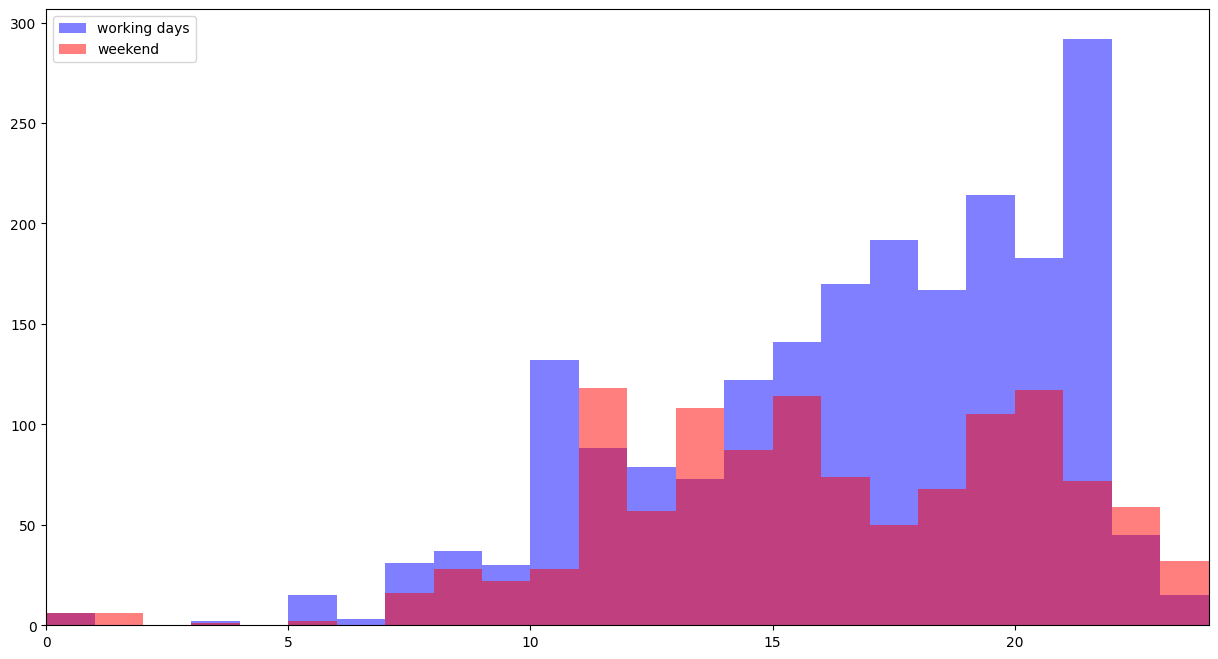

In [ ]:
working_hours = df[df['type'] == 'working_day']['timestamp'].dt.hour.tolist()
weekend_hours = df[df['type'] == 'weekend']['timestamp'].dt.hour.tolist()

fig, ax = plt.subplots(figsize=(15, 8))


# Ваши данные и построение гистограммы
ax.hist(working_hours, bins=range(25), color='blue', alpha=0.5, label='working days', align='mid', width=1)
ax.hist(weekend_hours, bins=range(25), color='red', alpha=0.5, label='weekend', align='mid', width=1)

ax.legend()

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.margins(x=0.0)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.show()

In [ ]:
conn.close()

Есть ли часы, когда общее число коммитов было больше в выходные, чем в рабочие дни?

Да. В 11, 13, 22, 23 часа (а ещё в полночь и в час ночи).